In [2]:
import pandas as pd
import numpy as np
from scipy.stats import anderson
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

In [3]:
sns.set_style("whitegrid")

In [111]:
param = 'TMP'
df = pd.read_csv(f'../data/processed/meteorological/{param}.csv')
print(df.shape)
df.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
0,2016-01-01,00:00,TMP,18.1,18.3,NaN,18.5,19.4,19.2,18.4,NaN,18.4,19.6
1,2016-01-01,01:00,TMP,17.3,17.3,NaN,17.5,18.3,18.6,17.8,NaN,17.5,18.9


In [112]:
#df_stack = df.drop(columns='PARAM').set_index(['FECHA','HORA']).stack()
#data = df_stack.reset_index()[0].dropna().values
#idx = data<=100
#data = data[idx]
#data = np.random.choice(data, 1000, replace=False)

data = df[['CEN']].dropna().values
tot = len(data)
idx = data<=100
data = data[idx]
data = np.random.choice(data, 1000, replace=False)

In [113]:
result = anderson(data)

In [114]:
print('Statistic result:',round(result.statistic,2))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]    
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic result: 13.9
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


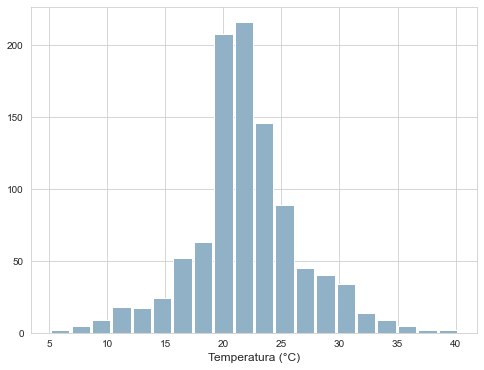

In [115]:
fig,ax = plt.subplots(figsize=(8, 6))

ax.hist(data, bins=20, rwidth=0.9,
                   color='#91b2c6')
plt.xlabel('Temperatura (°C)', fontsize=12)

plt.savefig(f'../output/figures/normality/{param}_Histogram.png', bbox_inches='tight', dpi=150)


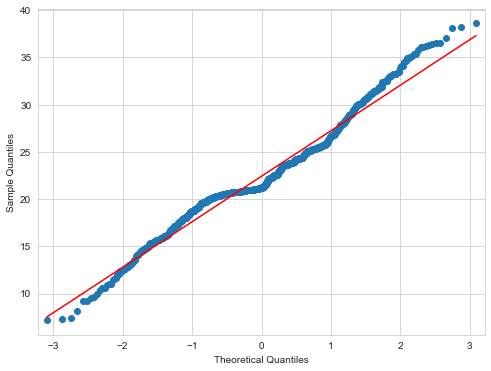

In [104]:
fig,ax = plt.subplots(figsize=(8, 6))
qqplot(data, line='s', ax=ax)

plt.savefig(f'../output/figures/normality/{param}_Quantile.png', bbox_inches='tight', dpi=150)

plt.show()

## HR

In [107]:
param = 'HR'
df = pd.read_csv(f'../data/processed/meteorological/{param}.csv')
print(df.shape)
df.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
0,2016-01-01,00:00,HR,71.5,70.3,73.4,71.0,79.8,75.1,74.2,NaN,68.3,70.1
1,2016-01-01,01:00,HR,73.6,74.2,75.7,75.4,84.0,77.8,76.4,NaN,71.6,71.9


In [108]:
data = df[['CEN']].dropna().values
tot = len(data)
idx = data<=100
data = data[idx]
data = np.random.choice(data, 1000, replace=False)

In [109]:
result = anderson(data)

In [110]:
print('Statistic result:',round(result.statistic,2))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]    
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic result: 5.83
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)
